# Домашнее задание №3. Продвинутая линейная алгебра.
## Уровень 0

In [ ]:
import numpy as np

In [ ]:
# a) Диагональная и ортогональная матрица:
A = np.array([[-1, 0, 0],
              [0, 1, 0],
              [0, 0, -1]])

# Проверка
A @ A.transpose()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
# b) Верхнетреугольная, ортогональная:
B = np.array([[1, 0],
              [0, -1]])

# Проверка
B @ B.transpose()

array([[1, 0],
       [0, 1]])

In [ ]:
# c) нижнетреугольная, ортогональная:
C = np.array([[-1, 0],
              [0, 1]])

# Проверка
C @ C.transpose()

array([[1, 0],
       [0, 1]])

In [ ]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:
D = np.array([[2, 1],
              [1, 1]])

# Проверка
np.linalg.det(D)

1.0

In [ ]:
# Найдите собственные значения и собственные вектора матриц:
m = np.array([[2, 2],
              [1, 3]])

w, v = np.linalg.eig(m)
print('Собственные значения:', w,
      'Собственные вектора:', v, sep='\n')

Собственные значения:
[1.00 4.00]
Собственные вектора:
[[-0.89 -0.71]
 [0.45 -0.71]]


## Уровень 1

In [ ]:
# Найдите спектральное разложение матрицы:
m = np.array([[1, 2],
              [2, 3]])

In [ ]:
w, v = np.linalg.eig(m)
w, v

(array([-0.24, 4.24]), array([[-0.85, -0.53],
        [0.53, -0.85]]))

In [ ]:
D = np.diag(w)
D

array([[-0.24, 0.00],
       [0.00, 4.24]])

In [ ]:
S = v.T

In [ ]:
# Проверка
S.T @ D @ S

array([[1.00, 2.00],
       [2.00, 3.00]])

In [ ]:
# Постройте зависимость качества восстановления рукописных цифр (MNIST)
# от количества компонент PCA

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [ ]:
pca_test = dict()

for i in range (1, 65):
    s = 0 
    pca = PCA(n_components=i)
    X_reduced = pca.fit_transform(X)
    X_inversed = pca.inverse_transform(X_reduced)
    for x_orig, x_pca in zip(X, X_inversed):
        s += MSE(x_orig, x_pca)
    pca_test[i] = round(s / X.shape[0], 4)

Text(0, 0.5, 'Среднеквадратичная ошибка')

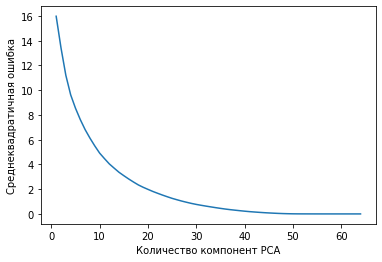

In [ ]:
plt.plot(list(pca_test.keys()), list(pca_test.values()))
plt.xlabel('Количество компонент PCA')
plt.ylabel('Среднеквадратичная ошибка')